In [82]:
from dolfin import *
import numpy as np

In [83]:
# Definim una quadrícula 10x10 en un domini [0,1]x[0,1]
mesh = UnitSquareMesh(10, 10)
V = FunctionSpace(mesh, "Lagrange", 1)

In [84]:
# Definim les funcions de  l'equació variacional, on x=x[0] i y=x[1]
u = TrialFunction(V)
v = TestFunction(V)
f = Expression("-6*x[0]*x[1]*(1-x[1])+2*x[0]*x[0]*x[0]", degree=2)
a = inner(grad(u), grad(v))*dx
L = f*v*dx

In [85]:
# Definim les condicions de contorn, primer a l'esquerra i després a la dreta
def left_boundary(x):
    return x[0] < DOLFIN_EPS

u_L = Constant(0.0)
Gamma_L = DirichletBC(V, u_L, left_boundary)


def right_boundary(x):
    return x[0] > 1.0 - DOLFIN_EPS

u_R = Expression("x[1]*(1-x[1])", degree=2)
Gamma_R = DirichletBC(V, u_R, right_boundary)

# Recollim les dues condicions en una llista
bcs = [Gamma_L, Gamma_R]

In [86]:
# Resolem el problema
u = Function(V)
solve(a == L, u, bcs)

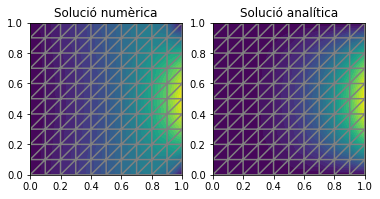

In [87]:
# Fem un plot de la solució
import matplotlib.pyplot as plt
plt.subplot(121)
plot(u)
plot(mesh)
plt.title("Solució numèrica")

# Representem ara la solució analítica és u_a(x,y)=y(1-y)x^3 
V2 = FunctionSpace(mesh, "Lagrange", 2)
u_a = Expression("x[1]*(1-x[1])*x[0]*x[0]*x[0]",degree=3)
u_a_V2 = interpolate(u_a,V2) # agafem els valors de u_a només a l'espai V2

plt.subplot(122)
plot(u_a_V2)
plot(mesh)
plt.title("Solució analítica")


plt.show()

In [88]:
# Calculem l'error
V2 = FunctionSpace(mesh, "Lagrange", 2)
u_V2 = interpolate(u,V2)
error = (u_V2-u_a_V2)**2*dx #error a cada punt de l'àrea
error_local = sqrt(assemble(error))
E = np.abs(u_a_V2.vector().get_local() - u_V2.vector().get_local()).max()
print(f"Error local : {error_local:.2e}")
print(f"Error : {E:.2e}")


Error local : 3.85e-02
Error : 1.05e-01


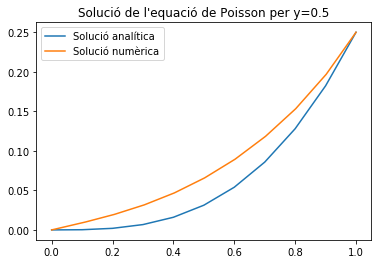

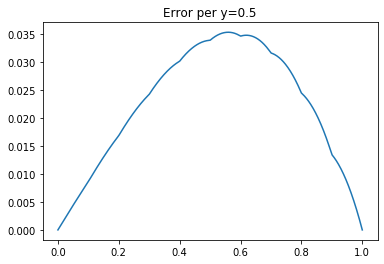

In [89]:
# Ara voldrem representar les funcions en 1 dimensió avaluant-les en y=0.5.
# Comencem amb la funció analítica
mesh_1d = IntervalMesh(10, 0, 1)
V_1d = FunctionSpace(mesh_1d, "Lagrange", 2)
u_a_y_05 = Expression("0.5*0.5*x[0]*x[0]*x[0]",degree=3)
u_a_05_V = interpolate(u_a_y_05,V_1d)
plot(u_a_05_V, label='Solució analítica')


# Ara amb la funció numèrica
eix_x = np.linspace(0, 1, 1000)
u_y_05 = np.zeros(1000)

for i, x in enumerate(eix_x):
    u_y_05[i] = u(x,0.5)

    
plt.plot(eix_x, u_y_05, label= 'Solució numèrica')
plt.legend()
plt.title("Solució de l'equació de Poisson per y=0.5")

plt.show()

# Representem ara la diferència entre les dos funcions

error_05 = np.zeros(1000)
for i, x in enumerate(eix_x):
    error_05[i] = u_y_05[i] - u_a_y_05(x)
plt.plot(eix_x, error_05)
plt.title("Error per y=0.5")

plt.show()






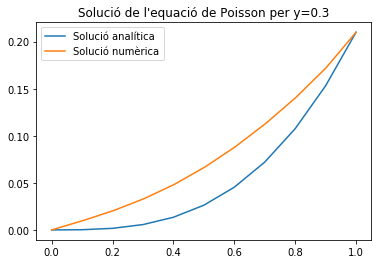

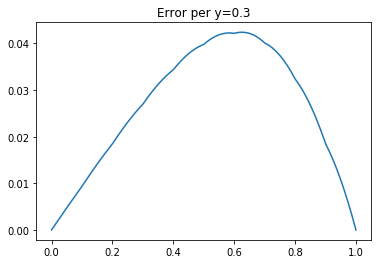

In [90]:
# Ara voldrem representar les funcions en 1 dimensió avaluant-les en y=0.3.
# Comencem amb la funció analítica
mesh_1d = IntervalMesh(10, 0, 1)
V_1d = FunctionSpace(mesh_1d, "Lagrange", 2)
u_a_y_03 = Expression("0.3*0.7*x[0]*x[0]*x[0]",degree=3)
u_a_03_V = interpolate(u_a_y_03,V_1d)
plot(u_a_03_V, label='Solució analítica')


# Ara amb la funció numèrica
eix_x = np.linspace(0, 1, 1000)
u_y_03 = np.zeros(1000)

for i, x in enumerate(eix_x):
    u_y_03[i] = u(x,0.3)

plt.plot(eix_x, u_y_03, label= 'Solució numèrica')
plt.title("Solució de l'equació de Poisson per y=0.3")
plt.legend()
plt.show()

# Representem ara la diferència entre les dos funcions

error_03 = np.zeros(1000)
for i, x in enumerate(eix_x):
    error_03[i] = u_y_03[i] - u_a_y_03(x)
plt.plot(eix_x, error_03)
plt.title("Error per y=0.3")
plt.show()
